<a href="https://colab.research.google.com/github/eanchiquep/Machine_Learning_Google_Lab/blob/master/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# metodo que ayuda cuando existe overfiting, es decir variación de los resultados del modelo dispersos, pero un Score alto.
#consiste en disminuir la complejidad del modelo, aplicando penalizaciones a las variables mas irrelevantes, vamos a intentar mantenerlas pero reduciendo su efecto, diferente a PCA
# en donde combinabamos las mismas  y obteniamos una nuevas variables o features

In [ ]:
import pandas as pd
from google.colab import drive
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso # modelo que transforma features en cero, y busca disminuir la varianza, sesgando un poco el modelo lineal
from sklearn.linear_model import Ridge # modelo que mantiene los features disminuyenso su impacto
from sklearn.linear_model import ElasticNet # modelo combinado entre Lasso y Ridge
from sklearn.metrics import mean_squared_error



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/db'
!ls

/content/drive/My Drive/Colab Notebooks/db
AGRICULTURE.csv			     happy2017.csv	     salarios.csv
bicicletas-compartidas.csv	     happy2019.csv	     test.csv
CO2.csv				     Heart.csv		     test.xlsx
covid_19_data.csv		     london_merged.csv	     titanic.png
diabetes.csv			     meteorite-landings.csv  titanic-test.csv
ELECTRICAL_ENERGY.csv		     meteorites_sum.csv      titanic-train.csv
FOREST.csv			     poblacion.csv
GlobalLandTemperaturesByCountry.csv  PUPOLATION.csv


In [ ]:
df = pd.read_csv('happy2017.csv')
df

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [ ]:
df.isnull().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [ ]:
df = df.drop(['Happiness.Rank','Country','Whisker.high','Whisker.low'], axis=1)

In [ ]:
df

,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...
150,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [ ]:
df.describe()

,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,5.354019,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,1.131230,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,4.505500,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,5.279000,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,6.101500,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [ ]:
df.columns

Index(['Happiness.Score', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [ ]:
X = df.loc[:,['Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual']]
y = df['Happiness.Score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

Modelo Linear sin utilizar regularizadores

In [ ]:
model_linear = LinearRegression()
model_linear.fit(X_train,y_train)
y_predit_linear = model_linear.predict(X_test)
model_linear_loss = mean_squared_error(y_test,y_predit_linear)
model_linear_loss

9.48767860528123e-08

regularizador Lasso

In [ ]:
model_lasso = Lasso(alpha=0.02) # entre mas grande sea el alpha, mas penalización utilizamos para nuestros features
model_lasso.fit(X_train,y_train)
y_predit_lasso = model_lasso.predict(X_test)
model_lasso_loss = mean_squared_error(y_test,y_predit_lasso)
model_lasso_loss 


0.04136597628967692

In [ ]:
#coeficiente de lasso

model_lasso.coef_

array([1.32674203, 0.85140601, 0.43713646, 0.89531439, 0.19058121,
       0.        , 0.91744247])

Regularizador ridge

In [ ]:
model_ridge = Ridge(alpha=1)
model_ridge.fit(X_train,y_train)
y_predit_ridge = model_ridge.predict(X_test)
model_ridge_loss = mean_squared_error(y_test,y_predit_ridge)
model_ridge_loss

0.005117094025053429

In [ ]:
#coeficiente de ridge
model_ridge.coef_

array([1.08725768, 0.94531187, 0.84762845, 0.90900483, 0.74095991,
       0.63710038, 0.9658033 ])

Regularizador Elasticnet

In [ ]:
model_elasticnet = ElasticNet(random_state=0)
model_elasticnet.fit(X_train, y_train)
y_predict_elastic = model_elasticnet.predict(X_test)
model_elastic_loss = mean_squared_error(y_test,y_predict_elastic)
model_elastic_loss

1.0859710440565193

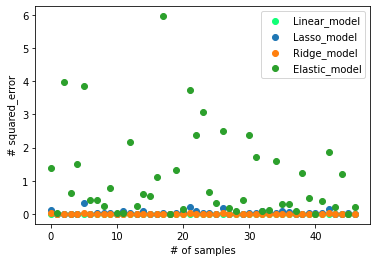

In [ ]:
y_mins_linear = (y_test - y_predit_linear)**2
y_mins_lasso = (y_test - y_predit_lasso)**2
y_mins_ridge = (y_test - y_predit_ridge)**2
y_mins_elastic = (y_test - y_predict_elastic)**2
x_graff = range(len(y_test))
plt.scatter(x_graff,y_mins_linear, c='#1f7')
plt.scatter(x_graff,y_mins_lasso)
plt.scatter(x_graff,y_mins_ridge)
plt.scatter(x_graff,y_mins_elastic)
plt.xlabel('# of samples')
plt.ylabel('# squared_error')
label = ['Linear_model','Lasso_model','Ridge_model','Elastic_model']
plt.legend(label)
